<h1> Medical Examination

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [27]:
df = pd.read_csv('medical_examination.csv')
df.head(4)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1


In [28]:
# 2. Add 'overweight' column
df['overweight'] = (df['weight'] / (df['height'] / 100) ** 2 > 25).astype(int)
df.head(2)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1


In [29]:
# 3. Normalize cholesterol and gluc values
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)
df.head(2)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1


In [30]:
def draw_cat_plot():
    # 5. Create DataFrame for cat plot
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

    # 6. Group and reformat the data to split it by cardio and count each feature
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'])['value'].count().reset_index(name='total')

    # 7. Create a categorical plot using seaborn
    cat_plot = sns.catplot(
        x='variable', y='total', hue='value', col='cardio',
        data=df_cat, kind='bar', height=5, aspect=1
    )

    # 8. Get the figure for the output
    fig = cat_plot.fig

    # 9. Save the plot as 'catplot.png'
    fig.savefig('catplot.png')
    return fig

In [31]:
# 10. Draw Heat Map
def draw_heat_map():
    # 11. Clean the data
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # 12. Calculate the correlation matrix
    corr = df_heat.corr()

    # 13. Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # 14. Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(10, 10))

    # 15. Draw the heatmap
    sns.heatmap(
        corr, mask=mask, annot=True, fmt='.1f', cmap='coolwarm',
        square=True, cbar_kws={'shrink': 0.5}, ax=ax
    )

    # 16. Save the plot as 'heatmap.png'
    fig.savefig('heatmap.png')
    return fig

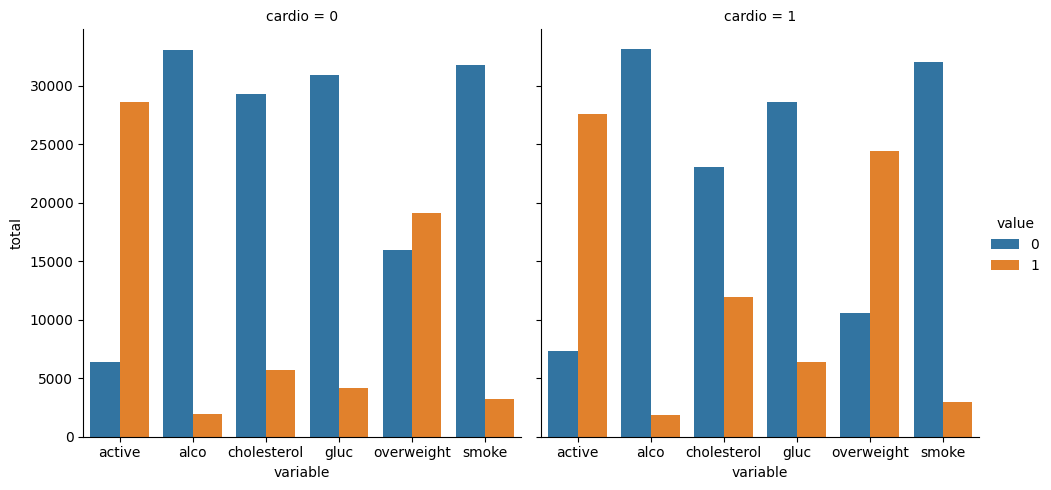

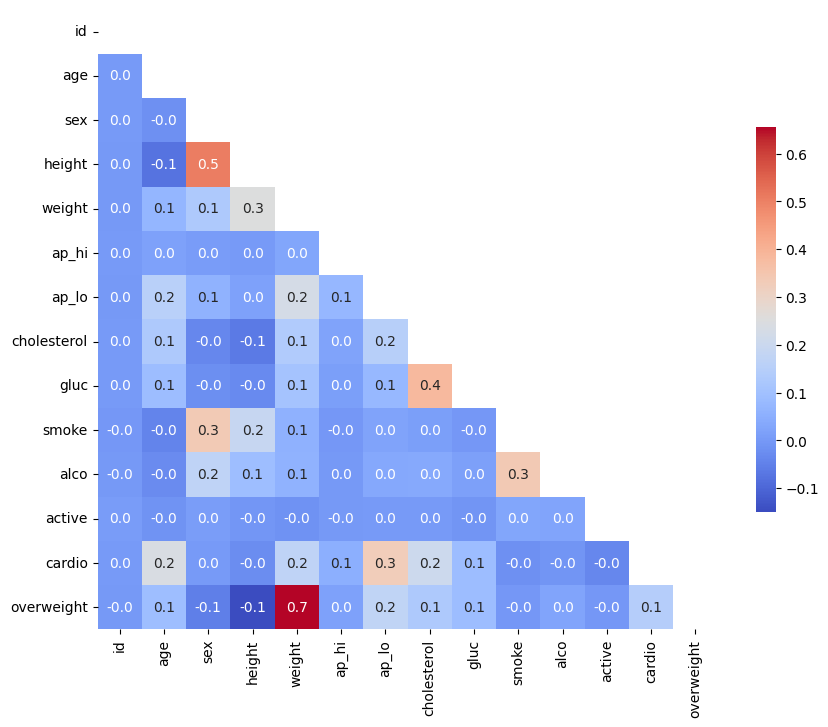

In [32]:
cat_plot_figure = draw_cat_plot()
heat_map_figure = draw_heat_map()